In [20]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

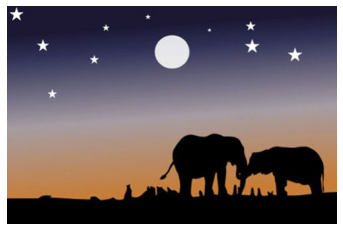

In [5]:
# Loading and displaying image
img=cv2.imread('elephant.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
# Flatening the image
all_pixels=img.reshape((-1, 3))

## Applying KMeans

In [9]:
dominant_colors=4
from sklearn.cluster import KMeans
km=KMeans(n_clusters=dominant_colors)

In [10]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Seeing the cluster centers' color

In [21]:
# Cluster centers
centers=km.cluster_centers_
centers=np.array(centers,dtype='uint8')
print(centers)

[[  1   0   1]
 [ 99  95 118]
 [175 145 128]
 [ 38  35  64]]


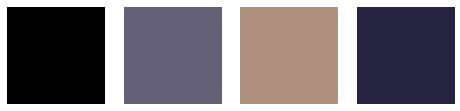

In [25]:
plt.figure(0, figsize=(8, 2))
for i, color in enumerate(centers):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    # Color swatch
    a=np.zeros((100, 100, 3), dtype='uint8')
    a[:, :, :]=color
    plt.imshow(a)
plt.show()

## Segmentation of original image

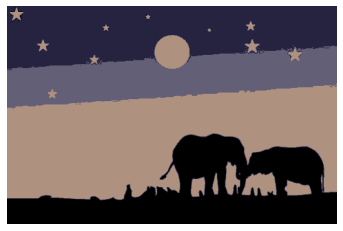

In [28]:
new_img=np.zeros((all_pixels.shape), dtype='uint8')
labels=km.labels_
for i in range(new_img.shape[0]):
    new_img[i]=centers[labels[i]]
new_img=new_img.reshape(img.shape)
plt.imshow(new_img)
plt.axis('off')
plt.show()